   #                              The Spark Foundation
## Task 3: Exploratory Data Analysis - Retail.

In [1]:
#Importing Basic Libraries that will be required throughout the project
import numpy as np
import pandas as pd
import warnings #ignore warnings
warnings.filterwarnings('ignore')

In [2]:
read_retail_data = pd.read_csv('SampleSuperstore.csv')

### Head
To take a closer look at the data, we take the help of “ .head()” function of pandas library which returns the first five observations of the data set. Similarly, “.tail()” returns last five observations of the data set.
You’ll see that this is a great way to get an initial feeling of your data and maybe understand it a bit better already!

In [3]:
read_retail_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Shape
Find out the total number of rows and columns in the dataset using “.shape”

In [4]:
read_retail_data.shape

(9994, 13)

### Get a Statistical Overview using Describe
The describe() function in pandas is very handy in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [5]:
read_retail_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Exploring the Features/Variables
Variables and features both are the same, they are often used interchangeably. All the column names in a dataset are variables.

Let's explore the features/columns of the datasets.

In [6]:
read_retail_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
read_retail_data['Profit'].unique()

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

In [8]:
read_retail_data['Profit'].nunique()

7287

value_counts function count the occurrenes of each value in the column.

In [9]:
read_retail_data['Profit'].value_counts()

 0.0000      65
 6.2208      43
 9.3312      38
 5.4432      32
 3.6288      32
             ..
-3.5622       1
-7.4800       1
 626.1850     1
-12.8392      1
 6.1704       1
Name: Profit, Length: 7287, dtype: int64

### Renaming Columns
* rename() is used to rename the columns
* parameters .rename(columns = {'old_name':'new_name'},inplace= True)
* inplace =True makes change in the dataframe itself.

In [10]:
read_retail_data.rename(columns= {'Ship Mode':'Ship_Mode', 'Postal Code':'Postal_Code'})

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Checking for Missing Values
Handling missing values is an essential part of the data cleaning and preparation process because almost all data in real life comes with some missing values.

Pandas provides isnull(), isna() functions to detect missing values. Both of them do the same thing.

* df.isna() returns the dataframe with boolean values indicating missing values.
* You can also choose to use notna() which is just the opposite of isna().
* df.isna().any() returns a boolean value for each column. If there is at least one missing value in that column, the result is True.
* df.isna().sum() returns the number of missing values in each column.

In [11]:
read_retail_data.isna()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
read_retail_data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Observation: There is no missing value in any column

### info()
read_retail_data.info returns information about the data frame including the data types of each column, number of null values in each column and memory usage of the entire data.

In [13]:
read_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Observations:
* The data has only float, integer, Object values.
* There are no missing values


### Checking for Duplicates

Duplicates might or might not affect the quality of data. Before deciding if they should be removed, it is essential to understand why they might have occurred in the first place.

Duplicates can be checked using the duplicated() method.

In [14]:
duplicate = read_retail_data[read_retail_data.duplicated()]
duplicate.shape

(17, 13)

### Top States by Sales and Profits

In [19]:
Top_Sales = read_retail_data.groupby("State").Sales.sum().nlargest()
Top_Profits = read_retail_data.groupby("State").Profit.sum().nlargest()

In [20]:
Top_Sales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania'], dtype='object', name='State')

In [21]:
Top_Profits.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia'], dtype='object', name='State')

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.boxplot(y,read_retail_data['Profit'],palette='GnBu_d')
plt.title("Profit")
plt.show()

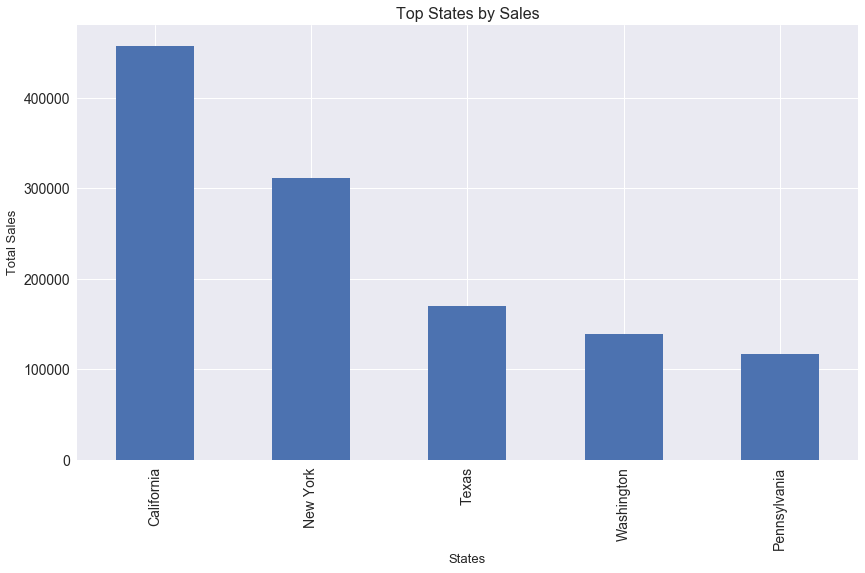

In [26]:
plt.style.use('seaborn')
Top_Sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top States by Sales",fontsize =16)
plt.show()

## California and New York are far ahead of their competitor states.

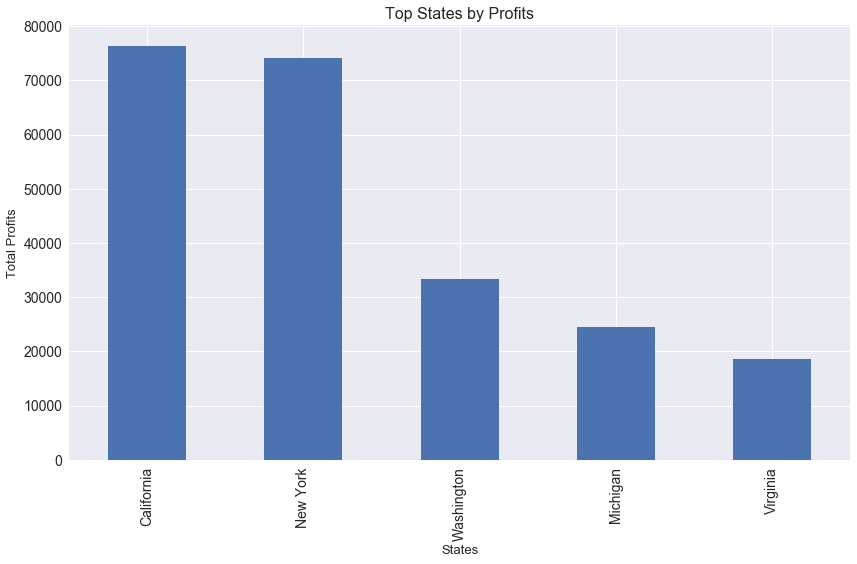

In [24]:
plt.style.use('seaborn')
Top_Profits.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top States by Profits",fontsize =16)
plt.show()

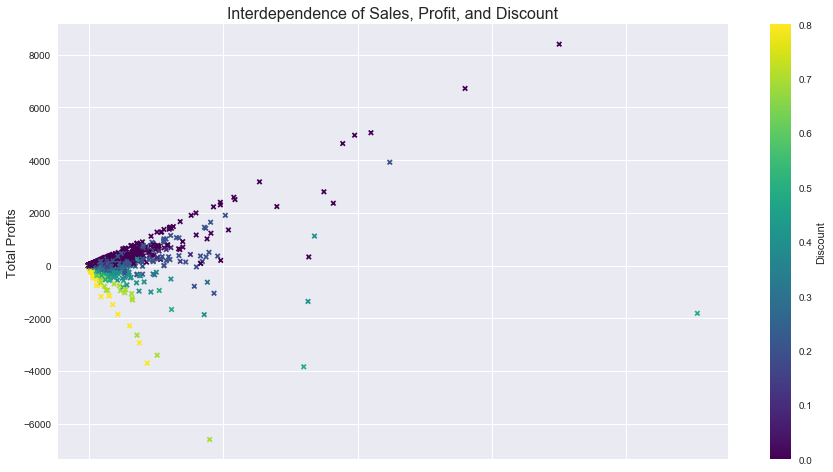

In [27]:
plt.style.use('seaborn')
read_retail_data.plot(kind = "scatter", figsize = (15,8), x = "Sales", y ="Profit" ,c ="Discount", s =20, marker ="x",colormap ="viridis")
plt.ylabel("Total Profits",fontsize =13)
plt.title("Interdependence of Sales, Profit, and Discount",fontsize =16)
plt.show()

#### Pair Plot

The pair plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

It plots every numerical attribute against every other.

pairplot function of seaborn helps to achieve this

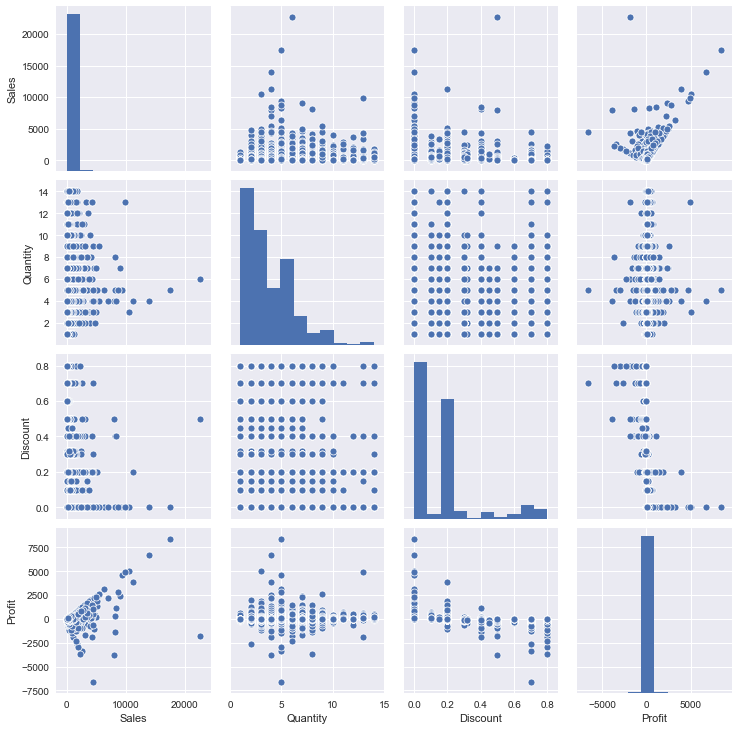

In [28]:
financial=read_retail_data.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(financial)

In [31]:
read_retail_data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


####Pair Plot Creating a pictorial visualisation of the above correlation matrix using a heatmap helps in better understanding. We can do that using Seaborn's Heatmap function.

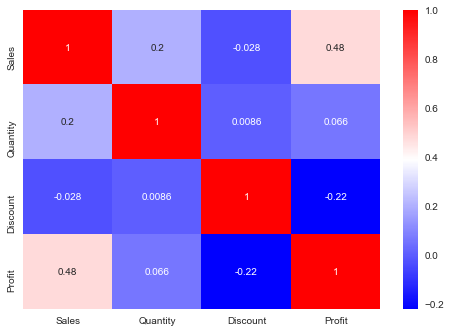

In [37]:
correlation=financial.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns, cmap='bwr', annot=True)

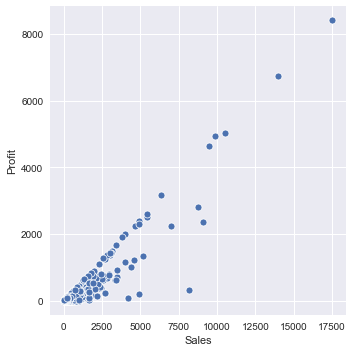

In [39]:
data=read_retail_data[read_retail_data['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=data)

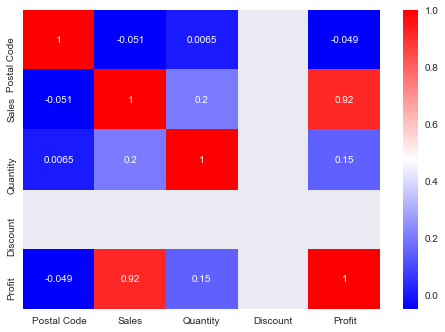

In [40]:
correlation=data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,cmap='bwr', annot=True)

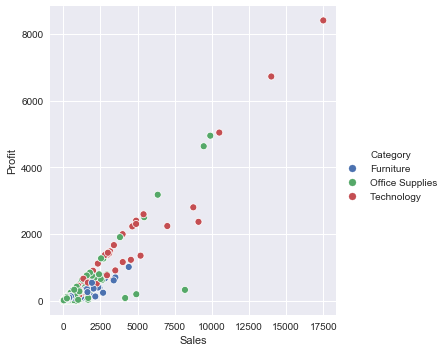

In [41]:
#Rel_plot with respect category
sns.relplot(x='Sales',y='Profit',hue='Category',data=data)

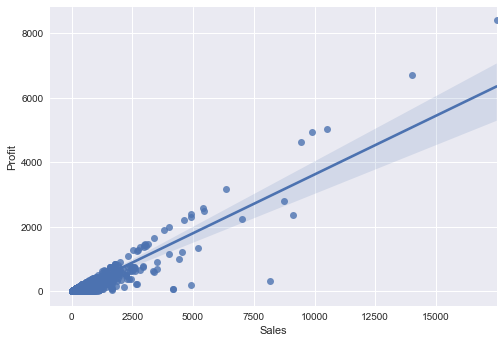

In [42]:
# Regression Plot 
sns.regplot(data['Sales'],data['Profit'])

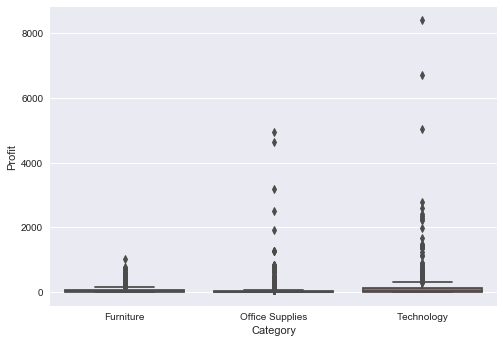

In [45]:
sns.boxplot(x='Category',y='Profit',data=data)

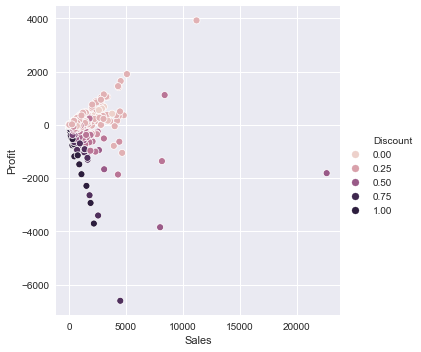

In [46]:
data1=read_retail_data[read_retail_data['Discount']!=0]
sns.relplot(x='Sales',y='Profit',hue='Discount',data=data1)

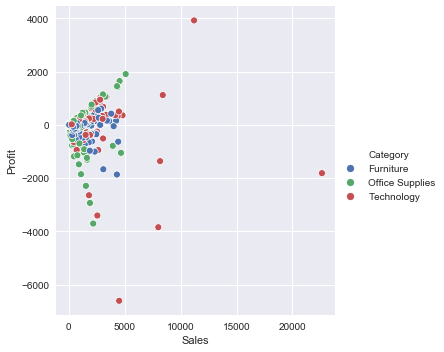

In [47]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=data1)

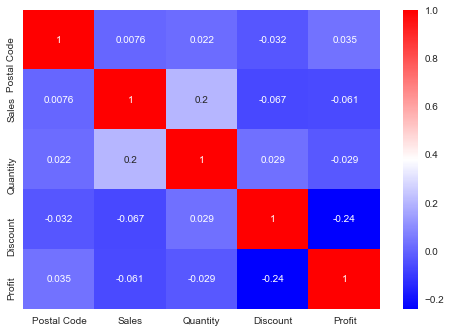

In [48]:
#realtion analysis
correlation=data1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,cmap='bwr',annot=True)

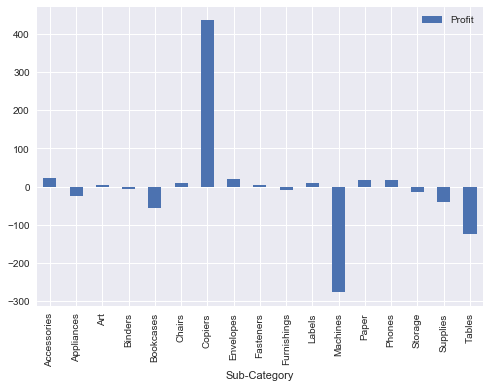

In [49]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')

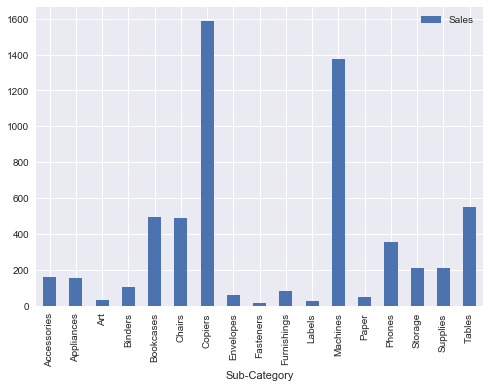

In [50]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')

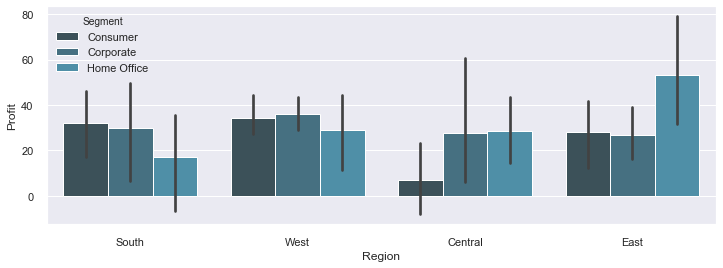

In [53]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette='GnBu_d')
sns.barplot(data = read_retail_data , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

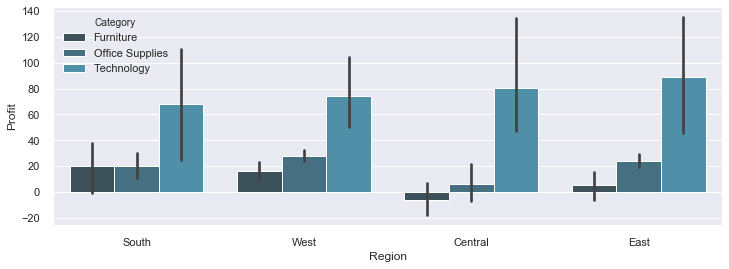

In [55]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette='GnBu_d')
sns.barplot(data = read_retail_data , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

In [57]:
# Grouping Data by Region and only slicing Data for Central Region from whole Data Set
gb_Central = list(read_retail_data.groupby("Region"))[0][1]

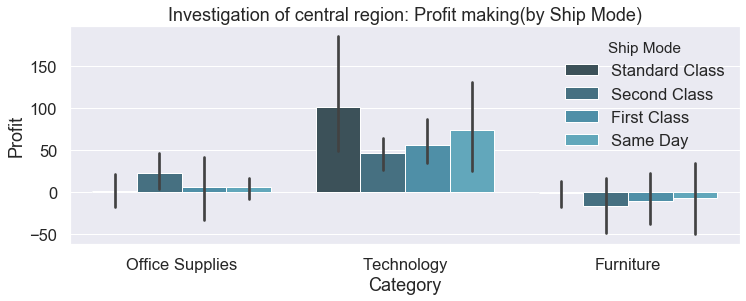

In [58]:
# Investing Further in cenral Region 
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5,  palette='GnBu_d')
sns.barplot(data = gb_Central, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.title("Investigation of central region: Profit making(by Ship Mode)")
plt.show()

In [59]:
# Slicing Furniture Data from whole data set
gb_Category_Furniture =list(list(read_retail_data.groupby("Region"))[0][1].groupby("Category"))[0][1]

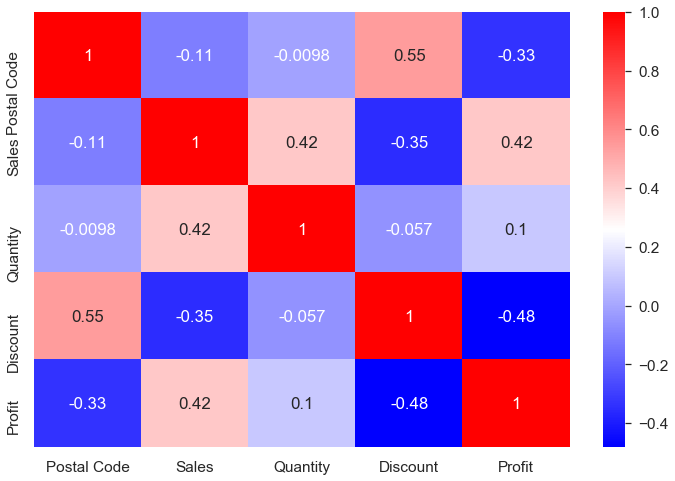

In [60]:
# Correlation matrix Heat Map to identify key factors influening profits
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
sns.heatmap(gb_Category_Furniture.corr() , annot = True, cmap ="bwr")
plt.show()

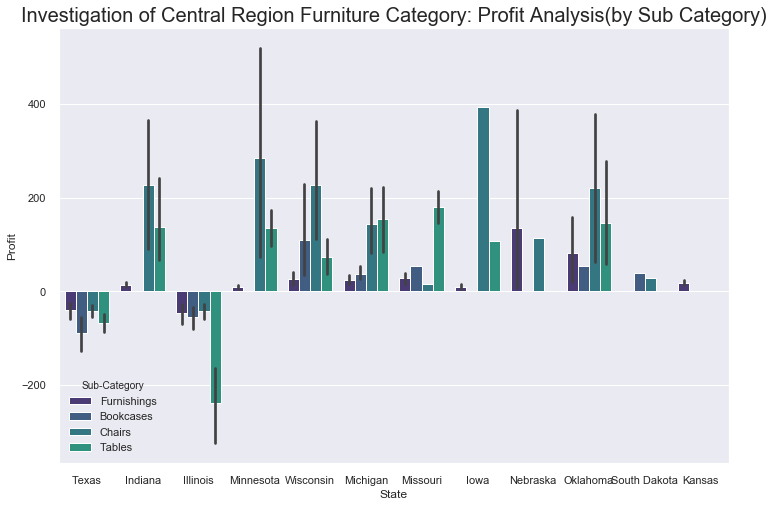

In [61]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Sub-Category")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Sub Category)", fontsize = 20)
plt.show()

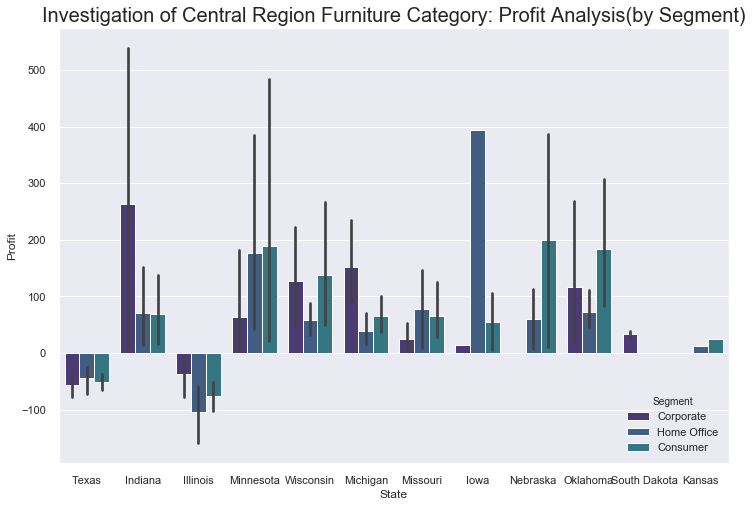

In [62]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Segment")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Segment)", fontsize = 20)
plt.show()

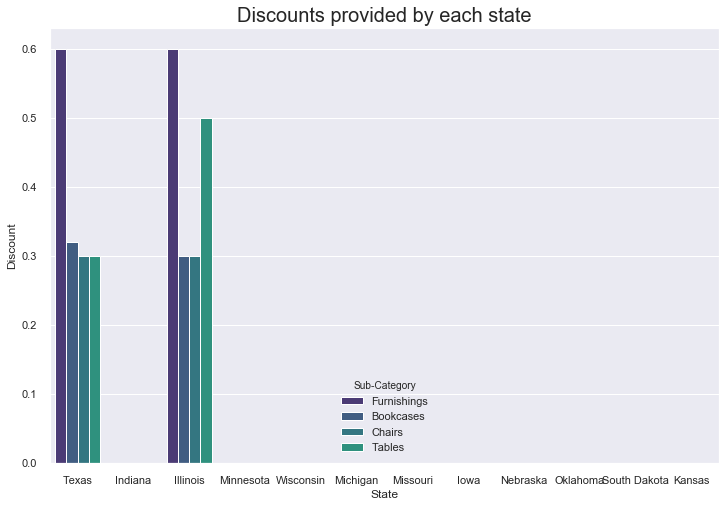

In [63]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Discount" ,hue = "Sub-Category")
plt.title("Discounts provided by each state", fontsize = 20)
plt.show()

<Figure size 864x576 with 0 Axes>

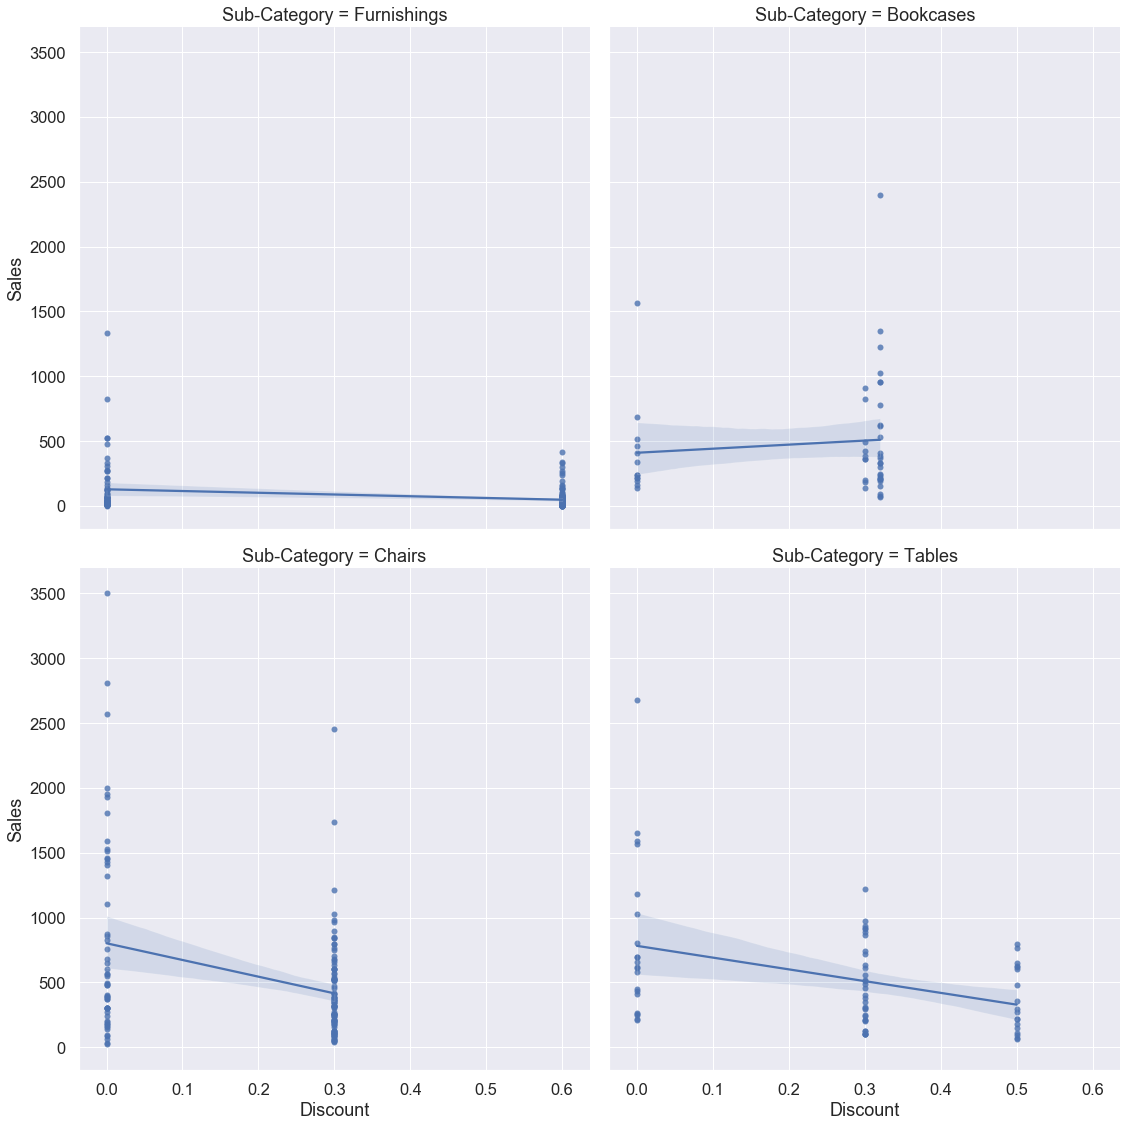

In [64]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
sns.lmplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", aspect = 1, height = 8, col ="Sub-Category", col_wrap= 2)
plt.show()

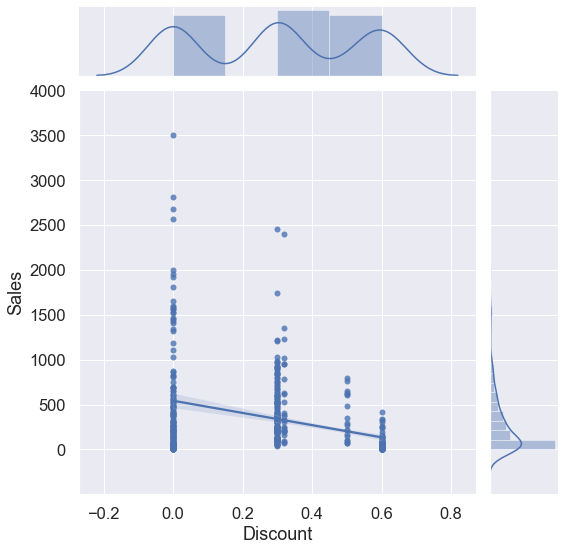

In [65]:
# Jiont plot for studying overall relationship between Sales and Discounts
sns.set(font_scale=1.5)
sns.jointplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", height = 8, kind = "reg")
plt.show()

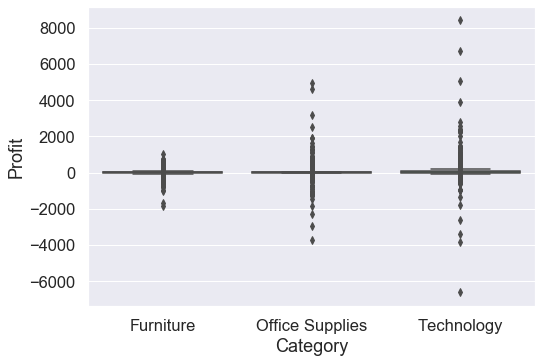

In [66]:
# box plot
sns.boxplot(x='Category',y='Profit',data=read_retail_data)

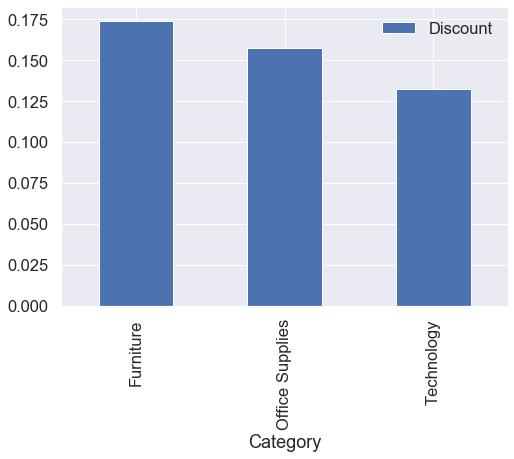

In [67]:
pivot=pd.pivot_table(read_retail_data,index='Category',values='Discount')
pivot.plot(kind='bar')

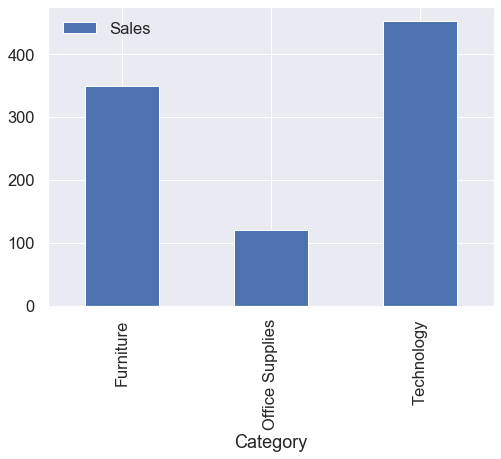

In [68]:
pivot=pd.pivot_table(read_retail_data,index='Category',values='Sales')
pivot.plot(kind='bar')

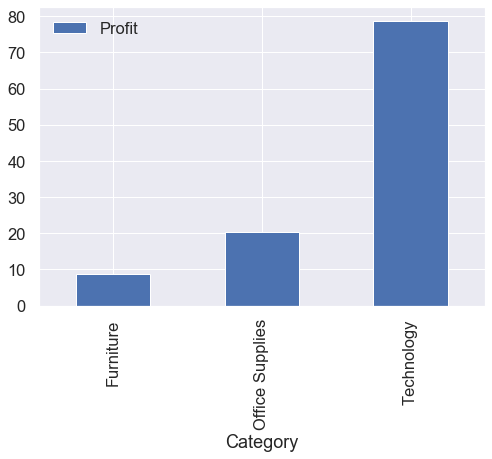

In [69]:
pivot=pd.pivot_table(read_retail_data,index='Category',values='Profit')
pivot.plot(kind='bar')